<a href="https://colab.research.google.com/github/josebruq/course-master-big-data-with-pyspark-and-aws/blob/main/cuaderno_de_notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesado de datos

¿Que librerias necesitamos para preprocesar datos?

-numpy as np  (contiene herramientas matemáticas)

-matplotlib.pyplot as plt (sublibreria para gráficos)

-pandas as pd (librería para cargar datos)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## ¿Como importar datos?

Como estamos usando google colab debemos montar el drive con la siguiente sentencia:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos el dataset desde google drive:
dataset=pd.read_csv('/content/drive/MyDrive/Cursos/Machine_learning_AZ/original/Part 1 - Data Preprocessing/Data.csv')
dataset.head()


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


Normalmente tenemos que distinguir entre variables independientes (X) y variables a predecir (Y).

En el caso que nos ocupa, buscamos precedir la compra o no mediante el análisis de las varibles Country, Age y Salary.

Por tanto:

X --> Country, Age y Salary

Y --> Purchased

Debemos separar el conjunto de datos en submatrices X e Y.


In [ ]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

## ¿Que hacer con los datos NaN?

Una de las soluciones sería eliminar todas las filas que contengan NaN, pero esto puede no ser conveniente a la hora de realizar análisis finos (Ejm: Una enfermedad rara)

La solución más aceptable es reemplazar los NaN por los valores medios
aunque también podriamos reemplazarlos por los valores moda o la mediana.

Usamos la librería sklearn.impute de la que importamos la clase SimpleImputer

In [ ]:
#Código para reemplazar los valores NaN por la media

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

print(X)


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


 ## Datos categoricos

Son datos no numéricos que nos permiten etiquetar datos.

Debemos traducir los datos categoricos a números para poder procesarlos.

### ¿Como transformar los datos categoricos?
Para poder transformar los datos categoricos debemos utilizar la librería labelEncoder de sklearn.preprocessing


In [ ]:
 # Importamos la librería labelEncoder de sklearn.preprocessing
 from sklearn.preprocessing import LabelEncoder

In [ ]:
#Creamos una copia de X para hacer pruebas
X1=X
#Sintaxis para convertir datos categoricos
labelEncoder_X1 = LabelEncoder()
labelEncoder_X.fit_transform(X1[:,0])

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

Fijemonos los que los números de los paises han sido reemplazados por un número diferente para cada categoria.

El problema es que estos números son ordinales mientras que los paises (categorias en este caso) no pueden ser ordenados de ninguna manera. Esto puede generar problemas a la hora de comparar variables categoricas.

**Para las variables no ordinales no tiene sentido esta conversión**



## Variables Dummy

Se pueden usar para representar variables no ordinales.

Representamos cada variable con un vector:

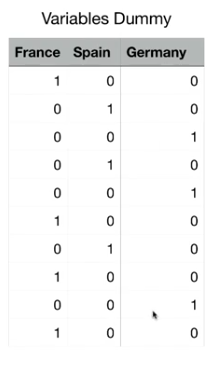



Para convertir variables categoricas no ordinales en Dummy empleamos la libreria OneHotEncoder de sklearn.preprocessing


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

  Using cached scikit-learn-0.20.0.tar.gz (28.1 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [ ]:
# Notar que este codigo no es correcto para la versión actual de sklearn
# hay que procesar todos los datos partiendo del dataset inicial para la nueva versión
# lo haré en un ejercicio final de preprocesado
X1=X
print(X1)
#Sintaxis para convertir variables categoricas NO ordinales en Dunny:
ohe = OneHotEncoder(categorical_features=[0])
dummy= ohe.fit_transform(X1).toarray()
print(dummy)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


TypeError: ignored